In [3]:
# Una idea de implementacion

# Parte 1
# Preprocesamos y aplicamos filtros (tenemos que determinanar qué filtros)
# Calculamos las sumas por columna y dividimos la imagen en los picos
# Cortamos esas columnas
# Para cada columna recortada, calculamos las sumas por filas
# Cortamos esas filas, para cada columna

# Parte 2
# Nos queda el diario dividido por distintos sectores
# Para cada sector, lo pasamos por un modelo de clasificacion

# En este notebook vamos a implementar la Parte 1

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from ImageProcessingPipeline import grayscale, binarize, gaussian, blur, laplacian, svd_compress

plt.rcParams['image.cmap'] = 'gray'

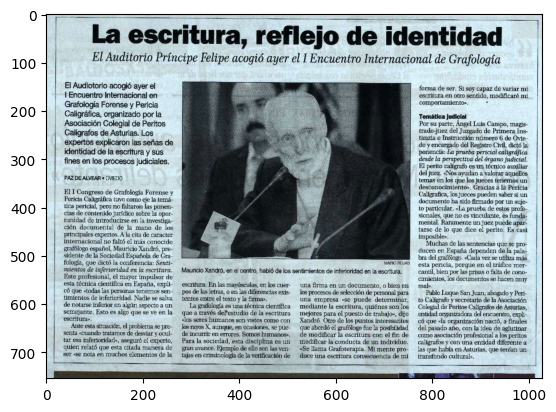

In [204]:
original_image = cv2.imread("diario2.png")
plt.imshow(original_image)

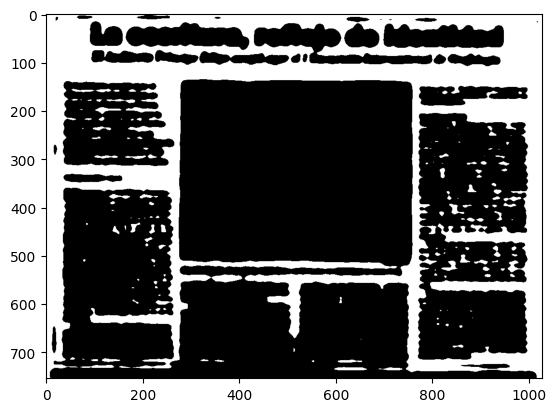

In [205]:
image = original_image.copy()

pipeline = [
    grayscale(),
    gaussian((27, 27)),
    #blur((3,3)),
    binarize(70),
]

for func in pipeline:
    image = func(image)
    plt.imshow(image)
    #plt.show()

plt.imshow(image)

Text(0, 0.5, 'Suma')

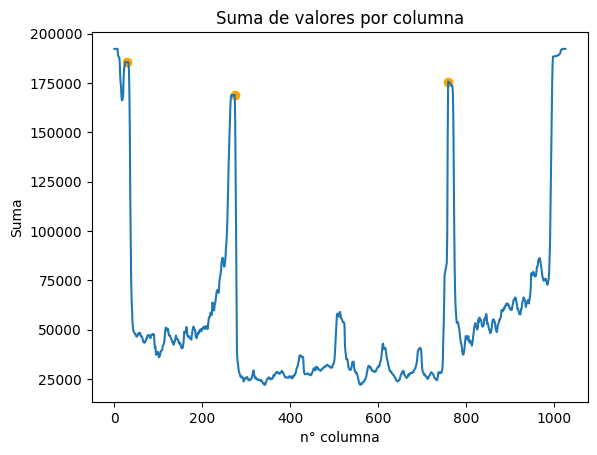

In [219]:
vertical_sum = np.sum(image, axis=0)

# Seria bueno calcular estos valores a partir de la imagen
MIN_PEAK_WIDTH = 10
MIN_PEAK_DISTANCE = 30
MIN_PEAK_HEIGHT = np.percentile(vertical_sum, 90)

# Idea de mejora:
# Podriamos "suavizar" la curva aplicando un moving average
# Ademas, de esa manera obtendriamos los picos centrados
vertical_seps, _ = find_peaks(vertical_sum, width=MIN_PEAK_WIDTH, distance=MIN_PEAK_DISTANCE, height=MIN_PEAK_HEIGHT)

plt.plot(vertical_sum)
plt.scatter(vertical_seps, vertical_sum[vertical_seps], color="orange")
plt.title("Suma de valores por columna")
plt.xlabel("n° columna")
plt.ylabel("Suma")

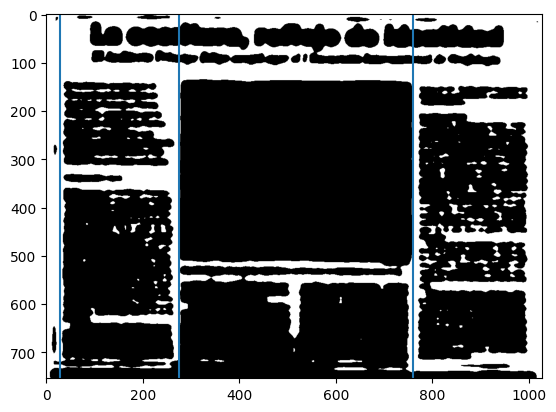

In [220]:
plt.imshow(image)
for sep in vertical_seps:
    plt.axvline(sep)

In [221]:
columns = np.split(image, vertical_seps, axis = 1)

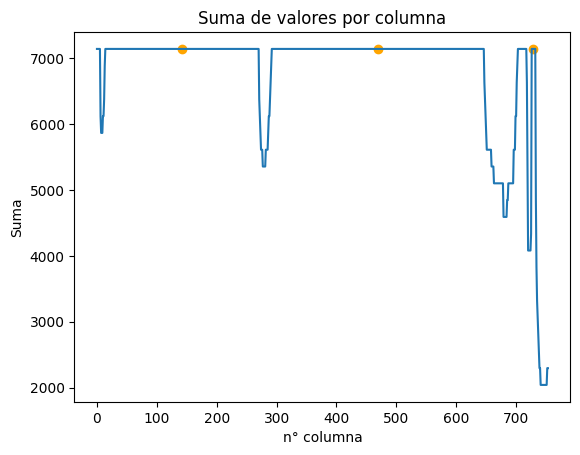

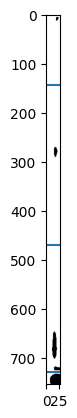

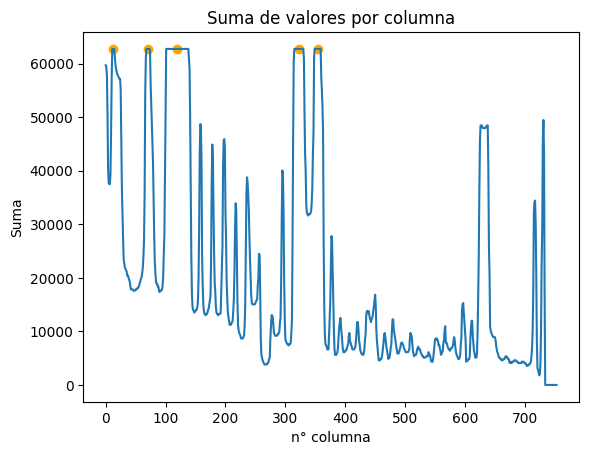

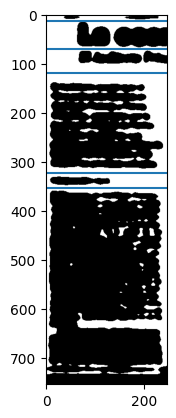

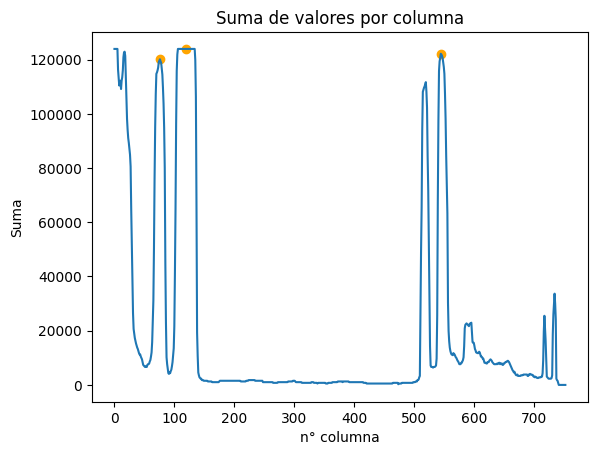

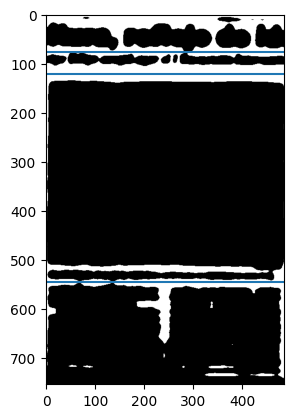

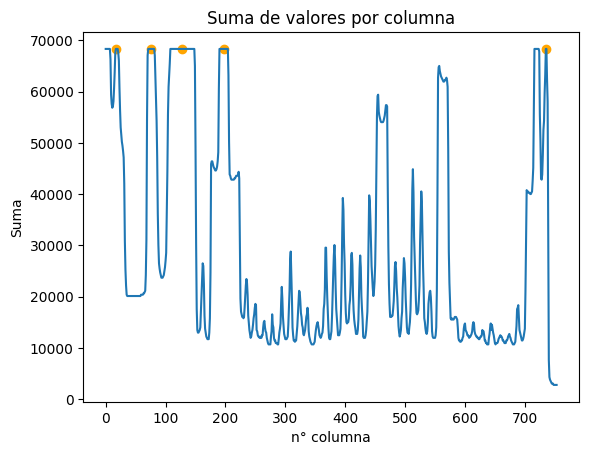

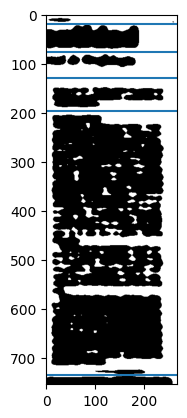

In [222]:
horizontal_seps_by_column = []

for column in columns:
    horizontal_sum = np.sum(column, axis=1)

    # Seria bueno calcular estos valores a partir de la imagen
    MIN_PEAK_WIDTH = 5
    MIN_PEAK_DISTANCE = 30
    MIN_PEAK_HEIGHT = np.percentile(horizontal_sum, 90)

    # Idea de mejora:
    # Podriamos "suavizar" la curva aplicando un moving average
    # Ademas, de esa manera obtendriamos los picos centrados
    horizontal_seps, _ = find_peaks(horizontal_sum, width=MIN_PEAK_WIDTH, distance=MIN_PEAK_DISTANCE, height=MIN_PEAK_HEIGHT)

    plt.plot(horizontal_sum)
    plt.scatter(horizontal_seps, horizontal_sum[horizontal_seps], color="orange")
    plt.title("Suma de valores por columna")
    plt.xlabel("n° columna")
    plt.ylabel("Suma")
    plt.show()

    plt.imshow(column)
    for sep in horizontal_seps:
        plt.axhline(sep)
    plt.show()    
    
    horizontal_seps_by_column.append(horizontal_seps)

0 28
28 274
274 760
760 1028


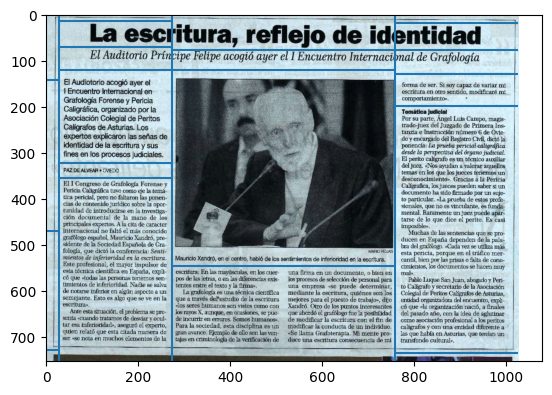

In [223]:
plt.imshow(original_image)

for sep in vertical_seps:
    plt.axvline(sep)

vertical_limits = np.insert(vertical_seps, 0, 0)
vertical_limits = np.append(vertical_limits, image.shape[1])

for i, horizontal_seps in enumerate(horizontal_seps_by_column):

    from_ = vertical_limits[i]
    to_ = vertical_limits[i+1]
    print(from_, to_)
    
    for sep in horizontal_seps:
        plt.hlines(sep, xmin=from_, xmax=to_)
